### Installing TA-Lib

In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 266kB 5.0MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.18-cp36-cp36m-linux_x86_64.whl size=1531844 sha256=d2fa68b008ae1cbc1dfd19f5e399722bb19fa3adab2fb422b683124295fd0a8a
  Stored in directory: /root/.cache/pip/wheels/11/cc/88/20dc42c28a07efb297dad4303948ef6dd4a3c7257553db8f09
Successfully built ta-lib


### Import necessary libraries

In [ ]:
#Import Libraries

import warnings
warnings.filterwarnings("ignore")

import os
import math
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### Reading Dataset

In [ ]:
#change the directory back to '/content/' to read uploaded dataset
os.chdir('/content/')

# Read the csv file
df = pd.read_csv('WIPRO_merger_12months.csv', date_parser=True)

df = df[['Open', 'High', 'Low', 'Close']]
df.dropna(inplace=True)
df_copy = df.copy()

stock_open = df['Open']
stock_high = df['High']
stock_low = df['Low']
stock_close = df['Close']

df

,Open,High,Low,Close
0,330.65,332.75,329.00,329.90
1,330.00,330.50,326.75,328.50
2,328.50,329.60,328.50,329.05
3,329.10,329.35,328.40,329.50
4,329.50,329.85,328.30,329.40
...,...,...,...,...
3169,248.00,248.60,247.85,248.15
3170,248.05,248.10,247.05,247.35
3171,247.40,247.40,246.65,246.80
3172,246.85,247.30,245.30,245.80


### Technical Indicators

### TREND INDICATORS

In [ ]:
#Compute MACD and MACD Histogram
macd, macdsignal, macdhist = talib.MACD(stock_close, fastperiod=12, slowperiod=26, signalperiod=9)

dict = {'MACD': macd, 'MSIG': macdsignal}
macdata = []
macdata = pd.DataFrame(data=dict)
macdata.dropna(inplace=True)

macdata['MACD_Signal1'] = macdata.apply(lambda x : 1 if x['MACD'] > x['MSIG'] else 0, axis = 1)

n_days = len(macdata['MACD'])
Signal = np.array(macdata['MACD_Signal1'])
psy = []



for d in range(0, n_days):
    
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
macdata['MACD_Signal'] = psy

del macdata['MACD_Signal1']

dict = {'MHIST': macdhist, 'PrevMHIST': macdhist.shift(1)}
machdata = []
machdata = pd.DataFrame(data=dict)
machdata.dropna(inplace=True)

machdata['MHIST_Signal1'] = machdata.apply(lambda x : 1 if x['MHIST'] > x['PrevMHIST'] else 0, axis = 1)

n_days = len(machdata['MHIST'])
Signal = np.array(machdata['MHIST_Signal1'])
psy = []

for d in range(0, n_days):
    
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
machdata['MHIST_Signal'] = psy

del machdata['MHIST_Signal1']

In [ ]:
#Compute Average Directional Index (ADX)
adx = talib.ADX(stock_high, stock_low, stock_close, timeperiod=14)

dict = {'Close': stock_close, 'ADX': adx }

adxdata = []
adxdata = pd.DataFrame(data=dict)
adxdata.dropna(inplace=True)

adxdata['adx1'] = adxdata.apply(lambda x : 1 if x['ADX'] > 25 else 0, axis=1)
adxdata['adx2'] = adxdata.apply(lambda x : -1 if x['ADX'] < 20 else 0, axis=1)

adxdata['Signw'] = adxdata.apply(lambda x : x['adx1'] + x['adx2'] , axis=1)

n_days = len(adxdata['ADX'])
Signal = np.array(adxdata['Signw'])
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
        
adxdata['Trend'] = psy

# del adxdata['Signw']
# del adxdata['adx1']
# del adxdata['adx2']

adxdata['ADX']

27      33.553372
28      33.050630
29      32.943934
30      32.844859
31      32.370302
          ...    
3169    20.173473
3170    18.974872
3171    17.829767
3172    18.029370
3173    18.214715
Name: ADX, Length: 3147, dtype: float64

In [ ]:
#Compute Parabolic SAR

sar = talib.SAR(stock_high, stock_low, acceleration=0.02, maximum=0.2)

dict = {'Close' : stock_close, 'SAR' : sar}

sardata = []
sardata = pd.DataFrame(data=dict)
sardata.dropna(inplace=True)

sardata['sar1'] = sardata.apply(lambda x: 1 if x['Close'] > x['SAR'] else 0, axis=1)
sardata['sar2'] = sardata.apply(lambda x: -1 if x['Close'] < x['SAR'] else 0, axis=1)
sardata['Sign1'] = sardata.apply(lambda x: x['sar1'] + x['sar2'], axis=1)

n_days = len(sardata['SAR'])
Signal = np.array(sardata['Sign1'])
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
        
sardata['Trend'] = psy

# del sardata['Sign1']
# del sardata['sar1']
# del sardata['sar2']


### MOMENTUM INDICATORS

In [ ]:
# #Compute Relatie Strength Index (RSI)
rsi = talib.RSI(stock_close, timeperiod=13)

dict = {'Close': stock_close, 'RSI': rsi }

rsidata = []
rsidata = pd.DataFrame(data=dict)
rsidata.dropna(inplace=True)

rsidata['rsi1'] = rsidata.apply(lambda x : 1 if x['RSI'] < 30 else 0, axis=1)
rsidata['rsi2'] = rsidata.apply(lambda x : -1 if x['RSI'] > 70 else 0, axis=1)
rsidata['Sign1'] = rsidata.apply(lambda x : x['rsi1'] + x['rsi2'], axis=1)

n_days = len(rsidata['RSI'])
Signal = np.array(rsidata['Sign1'])
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
rsidata['Psycology'] = psy

# del rsidata['Sign1']
# del rsidata['rsi1']
# del rsidata['rsi2']

rsidata['RSI']

13      46.710526
14      47.087643
15      45.016914
16      40.804961
17      40.804961
          ...    
3169    52.368288
3170    46.350701
3171    42.696587
3172    36.957673
3173    39.172002
Name: RSI, Length: 3161, dtype: float64

In [ ]:
# Compute Stochastic 
slowk, slowd = talib.STOCH(stock_high, stock_low, stock_close, fastk_period=13, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

dict  = {'Close' : stock_close, 'SOK' : slowk, 'SOD' : slowd}

sodata = []
sodata = pd.DataFrame(data=dict)
sodata.dropna(inplace=True)

sodata['d1'] = sodata.apply(lambda x: 1 if x['SOK'] < 20 and x['SOD'] < 20 else 0, axis=1)
sodata['d2'] = sodata.apply(lambda x: -1 if x['SOK'] > 80 and x['SOD'] > 80 else 0, axis=1)
sodata['Sign1'] = sodata.apply(lambda x: x['d1'] + x['d2'], axis=1)

n_days = len(sodata['SOK'])
Signal = np.array(sodata['Sign1'])
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
sodata['Psycology'] = psy

# del sodata['Sign1']
# del sodata['d1']
# del sodata['d2']

sodata['Sign1']

16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
       ... 
3169    0.0
3170    0.0
3171    0.0
3172    0.0
3173    0.0
Name: Sign1, Length: 3158, dtype: float64

In [ ]:
#Compute Commodity Chanel Index

real = talib.CCI(stock_high, stock_low, stock_close, timeperiod=13)

dict = {'Close': stock_close, 'CCI': real }

ccidata = []
ccidata = pd.DataFrame(data=dict)
ccidata.dropna(inplace=True)

ccidata['cci1'] = ccidata.apply(lambda x : 1 if x['CCI'] < -100 else 0, axis=1)
ccidata['cci2'] = ccidata.apply(lambda x : -1 if x['CCI'] > 100 else 0, axis=1)
ccidata['Sign1'] = ccidata.apply(lambda x : x['cci1'] + x['cci2'], axis=1)

n_days = len(ccidata['CCI'])
Signal = np.array(ccidata['Sign1'])
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
ccidata['Psycology'] = psy

# del ccidata['Sign1']
# del ccidata['cci1']
# del ccidata['cci2']

ccidata['CCI']

12     -116.633923
13       24.252533
14       52.192814
15       54.105737
16      -27.639640
           ...    
3169     93.959008
3170     11.874154
3171    -50.516622
3172   -127.094972
3173   -144.872270
Name: CCI, Length: 3162, dtype: float64

  ### VOLATILITY INDICATORS

In [ ]:
#Compute Bollinger Bands
upper, middle, lower = talib.BBANDS(stock_close, timeperiod=26)

dict = {'Close': stock_close, 'Middle': middle, 'Upper': upper, 'Lower': lower }

bbdata = []
bbdata = pd.DataFrame(data=dict)
bbdata.dropna(inplace=True)

#Generate the Long and Short Signals
n_days = len(bbdata['Middle'])
cash = 1
stock = 0

position = []

spread = stock_close
ma = middle
upper_band = upper
lower_band = lower

for d in range(0, n_days):
    
    # Long if spread < lower band & if not bought yet
    if spread[d] < lower_band[d] and cash == 1:
        signal = 1
        cash = 0
        stock = 1
        position.append(signal)
        
        
    # Take Profit if spread > moving average & if already bought
    elif spread[d] > ma[d] and stock == 1:
        signal = 3
        cash = 1
        stock = 0
        position.append(signal)
        
    # Short if spread > upper band and no current position
    elif spread[d] > upper_band[d] and cash == 1:
        signal = -1
        cash = 0
        stock = -1
        position.append(signal)
        

    # Take Profit if spread < moving average & if already short
    elif spread[d] < ma[d] and stock == -1:
        signal = 3
        cash = 1
        stock = 0
        position.append(signal)
    
    else:
        signal = 0
        position.append(signal)
        
bbdata['Position1'] = position
bbdata['Position1'] = bbdata['Position1'].replace(to_replace=0, method= 'ffill')
bbdata['Position1'] = bbdata['Position1'].replace(3,0)
bbdata['Position'] = bbdata['Position1']

del bbdata['Position1']

t_days = len(bbdata['Middle'])
Signal = np.array(bbdata['Position'])
pos = []

for d in range(0, t_days):
    if Signal[d] == 0:
        strategy = 0
        pos.append(strategy)
    
    elif Signal[d] == 1:
        strategy = 1
        pos.append(strategy)
    
    elif Signal[d] == -1:
        strategy = 0
        pos.append(strategy)

bbdata['Strategy'] = pos

bbdata

,Close,Middle,Upper,Lower,Position,Strategy
25,325.40,327.971154,331.587375,324.354933,0,0
26,323.40,327.721154,331.654265,323.788043,0,0
27,325.15,327.592308,331.632937,323.551678,0,0
28,324.95,327.434615,331.554620,323.314611,0,0
29,325.00,327.261538,331.397991,323.125086,0,0
...,...,...,...,...,...,...
3169,248.15,247.694231,249.408723,245.979739,1,1
3170,247.35,247.650000,249.338194,245.961806,1,1
3171,246.80,247.642308,249.344047,245.940568,1,1
3172,245.80,247.575000,249.418544,245.731456,1,1


### Next Closing Price

In [ ]:
# Computing Next DataPoint Move
#Compute Weekly Stock Move and Iddentify if > 0.003
stock_move = stock_close.shift(-1)

dict = {'Close': stock_close, 'Move': stock_move}

sdmdata = []
sdmdata = pd.DataFrame(data=dict)
sdmdata.dropna(inplace=True)

sdmdata['sign'] = sdmdata.apply(lambda x : 1 if np.log(x['Move']/x['Close']) > 0 else -1, axis=1)


n_days = len(sdmdata['Move'])
Signal = sdmdata['sign']
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
    
      
sdmdata['Next Point Move'] = psy

del sdmdata['sign']

sdmdata

,Close,Move,Next Point Move
0,329.90,328.50,0
1,328.50,329.05,1
2,329.05,329.50,1
3,329.50,329.40,0
4,329.40,329.30,0
...,...,...,...
3168,247.85,248.15,1
3169,248.15,247.35,0
3170,247.35,246.80,0
3171,246.80,245.80,0


### Final DataFrame

In [ ]:
# Renaming Technical Indicator DataFrames

Close = pd.DataFrame({'Close': stock_close})
NM = pd.DataFrame({'NM' : sdmdata['Move']})
RSI = pd.DataFrame({'RSI': rsidata['Sign1']})
SO = pd.DataFrame({'SO' : sodata['Sign1']})
ADX = pd.DataFrame({'ADX': adxdata['Signw']})
BB = pd.DataFrame({'BB': bbdata['Strategy']})
MACD = pd.DataFrame({'MACD': macdata['MACD_Signal']})
MHIST = pd.DataFrame({'MHIST': machdata['MHIST_Signal']})
CCI = pd.DataFrame({'CCI' : ccidata['Sign1']})
SAR = pd.DataFrame({'SAR' : sardata['Sign1']})
# Merging into Single DataFrame

merge1 = pd.merge(Close, NM, left_index=True, right_index=True, how='outer')
merge2 = pd.merge(merge1, RSI, left_index=True, right_index=True, how='outer')
merge3 = pd.merge(merge2, ADX, left_index=True, right_index=True, how='outer')
merge4 = pd.merge(merge3, MACD, left_index=True, right_index=True, how='outer')
merge5 = pd.merge(merge4, MHIST, left_index=True, right_index=True, how='outer')
merge6 = pd.merge(merge5, SO, left_index=True, right_index=True, how='outer')
merge7 = pd.merge(merge6, CCI, left_index=True, right_index=True, how='outer')
merge8 = pd.merge(merge7, SAR, left_index=True, right_index=True, how='outer')
df_final = pd.merge(merge8, BB, left_index=True, right_index=True, how='outer')
df_final.dropna(inplace=True)

df_final

,Close,NM,RSI,ADX,MACD,MHIST,SO,CCI,SAR,BB
34,325.35,325.10,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,0.0
35,325.10,325.20,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
36,325.20,325.80,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
37,325.80,324.35,0.0,1.0,1.0,1.0,0.0,-1.0,1.0,0.0
38,324.35,324.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3168,247.85,248.15,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,1.0
3169,248.15,247.35,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,1.0
3170,247.35,246.80,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,1.0
3171,246.80,245.80,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,1.0


### Getting Training Data

In [ ]:
training_size = math.ceil(0.66 * df_final.shape[0])
training_size

2072

In [ ]:
test_size = df_final.shape[0] - training_size
test_size

1067

In [ ]:
train_data = df_final[:training_size]
train_data

,Close,NM,RSI,ADX,MACD,MHIST,SO,CCI,SAR,BB
34,325.35,325.10,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,0.0
35,325.10,325.20,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
36,325.20,325.80,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
37,325.80,324.35,0.0,1.0,1.0,1.0,0.0,-1.0,1.0,0.0
38,324.35,324.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2101,250.70,250.95,0.0,-1.0,1.0,1.0,0.0,-1.0,1.0,0.0
2102,250.95,251.35,0.0,-1.0,1.0,1.0,0.0,-1.0,1.0,0.0
2103,251.35,250.45,0.0,-1.0,1.0,1.0,0.0,-1.0,1.0,0.0
2104,250.45,249.90,0.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
train_data.shape

(2072, 10)

In [ ]:
X_train = train_data[['Close', 'MACD', 'MHIST', 'ADX', 'SAR', 'RSI', 'SO', 'CCI', 'BB']]
y_train = train_data[['NM']]

X_train.shape, y_train.shape

((2072, 9), (2072, 1))

In [ ]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_train = scalerX.fit_transform(X_train)
y_train = scalerY.fit_transform(y_train)

X_train, y_train = np.array(X_train), np.array(y_train)
X_trainLSTM, y_trainLSTM = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)), np.array(y_train)
X_trainLSTM.shape, y_trainLSTM.shape

((2072, 9, 1), (2072, 1))

In [ ]:
X_train.shape, y_train.shape

((2072, 9), (2072, 1))

### Building Models

In [ ]:
model = Sequential()

model.add(LSTM(units=40, activation='relu', return_sequences=True, input_shape=(X_trainLSTM.shape[1], 1)))
model.add(Dropout(rate=0.1))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(rate=0.1))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 9, 40)             6720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 40)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 9, 60)             24240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 60)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               86880     
_________________________________________________________________
dropout_3 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_trainLSTM, y_trainLSTM, batch_size=128, epochs=30)

Epoch 1/30
2072/2072 [==============================] - 2s 1ms/step - loss: 0.1459
Epoch 2/30
2072/2072 [==============================] - 1s 487us/step - loss: 0.0838
Epoch 3/30
2072/2072 [==============================] - 1s 477us/step - loss: 0.0785
Epoch 4/30
2072/2072 [==============================] - 1s 476us/step - loss: 0.0763
Epoch 5/30
2072/2072 [==============================] - 1s 484us/step - loss: 0.0720
Epoch 6/30
2072/2072 [==============================] - 1s 489us/step - loss: 0.0647
Epoch 7/30
2072/2072 [==============================] - 1s 487us/step - loss: 0.0530
Epoch 8/30
2072/2072 [==============================] - 1s 503us/step - loss: 0.0410
Epoch 9/30
2072/2072 [==============================] - 1s 472us/step - loss: 0.0293
Epoch 10/30
2072/2072 [==============================] - 1s 481us/step - loss: 0.0211
Epoch 11/30
2072/2072 [==============================] - 1s 490us/step - loss: 0.0148
Epoch 12/30
2072/2072 [==============================] - 1s 474us

In [ ]:
regr_rbf = SVR(kernel='rbf', gamma=0.1)
regr_poly = SVR(kernel='poly', degree=2)
regr_lin = SVR(kernel='linear')
regr_rfr = RandomForestRegressor(n_estimators=150, criterion='mse', oob_score=True)
regr_gbr = GradientBoostingRegressor(loss='ls', n_estimators=150, criterion='friedman_mse', )

regr_rbf.fit(X_train, y_train)
regr_poly.fit(X_train, y_train)
regr_lin.fit(X_train, y_train)
regr_rfr.fit(X_train, y_train)
regr_gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Testing

In [ ]:
test_data = df_final[training_size - 1:]

X_test = test_data[['Close', 'MACD', 'MHIST', 'ADX', 'SAR', 'RSI', 'SO', 'CCI', 'BB']]
y_test = test_data[['NM']]

X_test.shape, y_test.shape

((1068, 9), (1068, 1))

In [ ]:
X_test = scalerX.fit_transform(X_test)
y_test = scalerY.fit_transform(y_test)

X_test, y_test = np.array(X_test), np.array(y_test)
X_testLSTM, y_testLSTM = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)), np.array(y_test)
X_testLSTM.shape, y_testLSTM.shape

((1068, 9, 1), (1068, 1))

In [ ]:
y_hatLSTM = model.predict(X_testLSTM)

In [ ]:
y_hat_rbf = regr_rbf.predict(X_test)
y_hat_poly = regr_poly.predict(X_test)
y_hat_lin = regr_lin.predict(X_test)
y_hat_rfr = regr_rfr.predict(X_test)
y_hat_gbr = regr_gbr.predict(X_test)

In [ ]:
y_hatLSTM = scalerY.inverse_transform(y_hatLSTM)
y_testLSTM = scalerY.inverse_transform(y_testLSTM)

In [ ]:
y_hat_poly = np.reshape(y_hat_poly, (y_hat_poly.shape[0], 1))
y_hat_rbf = np.reshape(y_hat_rbf, (y_hat_rbf.shape[0], 1))
y_hat_lin = np.reshape(y_hat_lin, (y_hat_lin.shape[0], 1))
y_hat_rfr = np.reshape(y_hat_rfr, (y_hat_rfr.shape[0], 1))
y_hat_gbr = np.reshape(y_hat_gbr, (y_hat_gbr.shape[0], 1))

In [ ]:
y_hat_poly = scalerY.inverse_transform(y_hat_poly)
y_hat_rbf = scalerY.inverse_transform(y_hat_rbf)
y_hat_lin = scalerY.inverse_transform(y_hat_lin)
y_hat_rfr = scalerY.inverse_transform(y_hat_rfr)
y_hat_gbr = scalerY.inverse_transform(y_hat_gbr)
y_test = scalerY.inverse_transform(y_test)

### LSTM Model

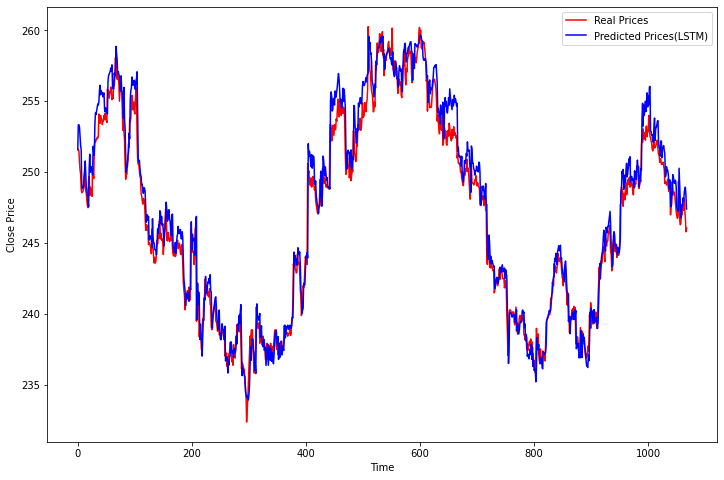

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_testLSTM, color='red', label='Real Prices')
plt.plot(y_hatLSTM, color='blue', label='Predicted Prices(LSTM)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### SVR-RBF Model

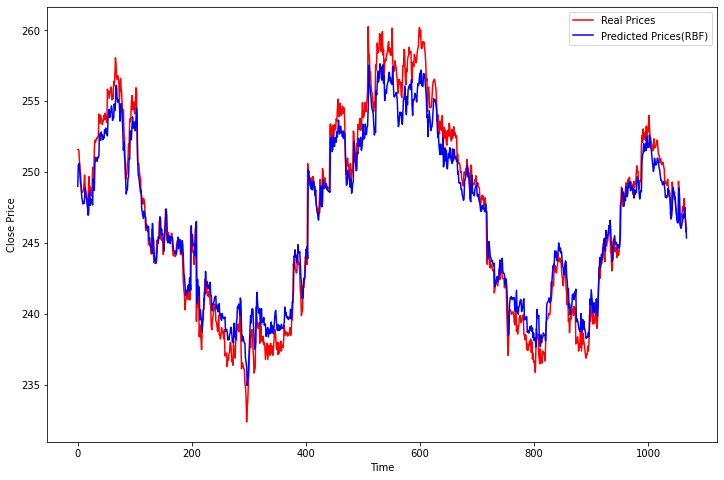

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color='red', label='Real Prices')
plt.plot(y_hat_rbf, color='blue', label='Predicted Prices(RBF)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### SVR-Poly Model

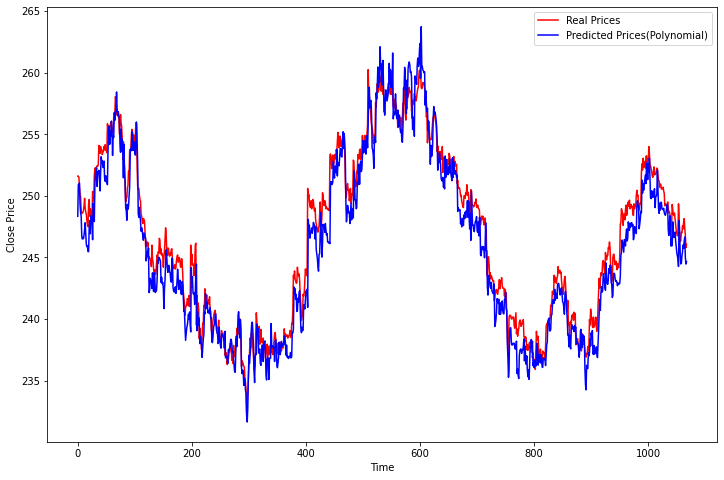

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color='red', label='Real Prices')
plt.plot(y_hat_poly, color='blue', label='Predicted Prices(Polynomial)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### SVR-Linear Model

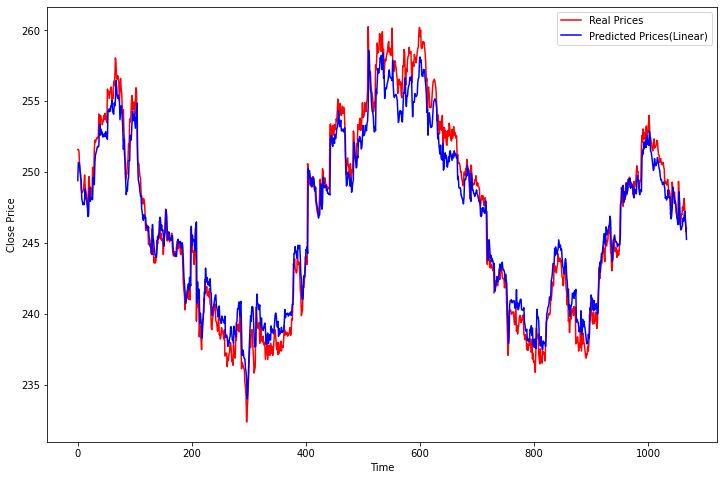

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color='red', label='Real Prices')
plt.plot(y_hat_lin, color='blue', label='Predicted Prices(Linear)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Random Forest Regressor Model

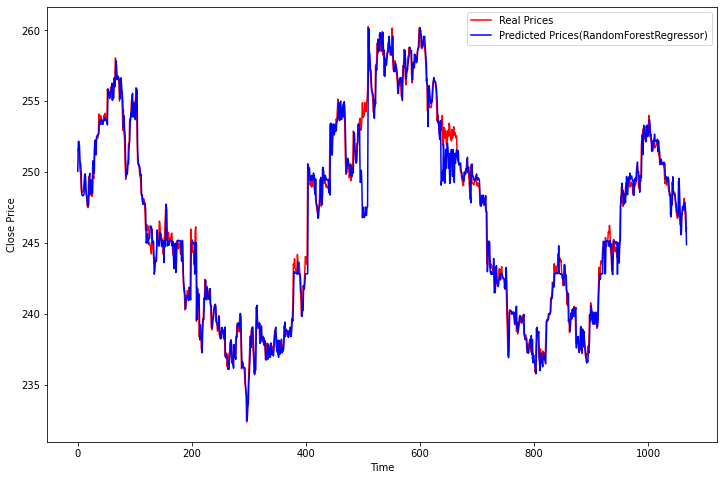

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color='red', label='Real Prices')
plt.plot(y_hat_rfr, color='blue', label='Predicted Prices(RandomForestRegressor)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Gradient Boosting Regressor

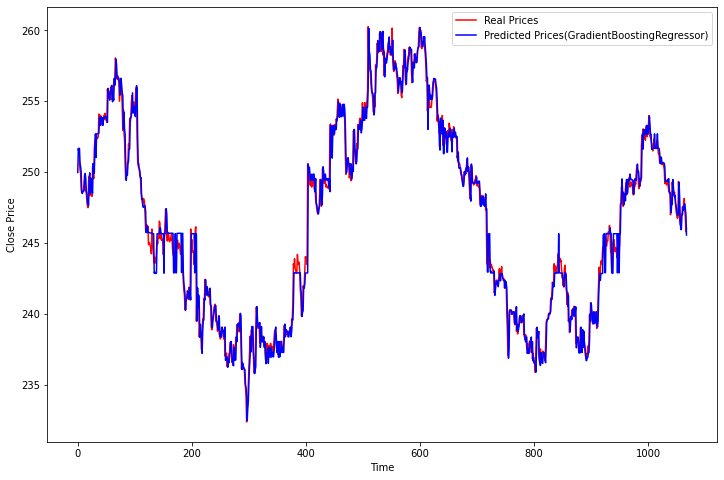

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color='red', label='Real Prices')
plt.plot(y_hat_gbr, color='blue', label='Predicted Prices(GradientBoostingRegressor)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Directional Symmetry

In [ ]:
def directional_asymmetry(y_hat, y_test):
  next_real = pd.Series(np.reshape(y_test, (y_test.shape[0]))).shift(-1)
  next_pred = pd.Series(np.reshape(y_hat, (y_hat.shape[0]))).shift(-1)
  curr_real = pd.Series(np.reshape(y_test, (y_test.shape[0])))[:y_test.shape[0] - 1]
  next_real.dropna(inplace=True)
  next_pred.dropna(inplace=True)
  direction_count = 0
  for i in range(next_real.shape[0]): 
    if next_real[i] > curr_real[i] and next_pred[i] > curr_real[i]:
      direction_count += 1
    elif next_real[i] < curr_real[i] and next_pred[i] < curr_real[i]:
      direction_count += 1
    elif next_real[i] == curr_real[i] and next_pred[i] == curr_real[i]:
      direction_count += 1
  return 1 - (direction_count / next_real.shape[0])

### Errors

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE_rbf = mean_squared_error(y_hat_rbf, y_test)
MSE_poly = mean_squared_error(y_hat_poly, y_test)
MSE_lin = mean_squared_error(y_hat_lin, y_test)
MSE_rfr = mean_squared_error(y_hat_rfr, y_test)
MSE_gbr = mean_squared_error(y_hat_gbr, y_test)
MSE_LSTM = mean_squared_error(y_hatLSTM, y_testLSTM)

MAE_rbf = mean_absolute_error(y_hat_rbf, y_test)
MAE_poly = mean_absolute_error(y_hat_poly, y_test)
MAE_lin = mean_absolute_error(y_hat_lin, y_test)
MAE_rfr = mean_absolute_error(y_hat_rfr, y_test)
MAE_gbr = mean_absolute_error(y_hat_gbr, y_test)
MAE_LSTM = mean_absolute_error(y_hatLSTM, y_testLSTM)

DA_LSTM = directional_asymmetry(y_hatLSTM, y_testLSTM)
DA_lin = directional_asymmetry(y_hat_lin, y_test)
DA_poly = directional_asymmetry(y_hat_poly, y_test)
DA_rbf = directional_asymmetry(y_hat_rbf, y_test)
DA_rfr = directional_asymmetry(y_hat_rfr, y_test)
DA_gbr = directional_asymmetry(y_hat_gbr, y_test) 

mse = minmax_scale(np.transpose([MSE_LSTM, MSE_lin, MSE_poly, MSE_rbf, MSE_rfr, MSE_gbr]))
mae = minmax_scale(np.transpose([MAE_LSTM, MAE_lin, MAE_poly, MAE_rbf, MAE_rfr, MAE_gbr]))
da = [DA_LSTM, DA_lin, DA_poly, DA_rbf, DA_rfr, DA_gbr]

In [ ]:
print('MEAN Absolute Errors:')
print('LSTM : {:.4f}'.format(MAE_LSTM))
print('SVR-Linear : {:.4f}'.format(MAE_lin))
print('SVR-Poly : {:.4f}'.format(MAE_poly))
print('SVR-Rbf : {:.4f}'.format(MAE_rbf))
print('RFR : {:.4f}'.format(MAE_rfr))
print('GBR : {:.4f}'.format(MAE_gbr))

MEAN Absolute Errors:
LSTM : 0.9738
SVR-Linear : 1.0823
SVR-Poly : 1.3944
SVR-Rbf : 1.1476
RFR : 0.7450
GBR : 0.6429


In [ ]:
print('MEAN Squared Errors:')
print('LSTM : {:.4f}'.format(MSE_LSTM))
print('SVR-Linear : {:.4f}'.format(MSE_lin))
print('SVR-Poly : {:.4f}'.format(MSE_poly))
print('SVR-Rbf : {:.4f}'.format(MSE_rbf))
print('RFR : {:.4f}'.format(MSE_rfr))
print('GBR: {:.4f}'.format(MSE_gbr))

MEAN Squared Errors:
LSTM : 1.5847
SVR-Linear : 1.8186
SVR-Poly : 2.9061
SVR-Rbf : 2.0442
RFR : 1.5043
GBR: 0.8336


In [ ]:
print('Directional Symmetry:')
print('LSTM : {:.4f}%'.format(100 - (DA_LSTM * 100)))
print('SVR-Linear : {:.4f}%'.format(100 - (DA_lin * 100)))
print('SVR-Poly : {:.4f}%'.format(100 - (DA_poly * 100)))
print('SVR-Rbf : {:.4f}%'.format(100 - (DA_rbf * 100)))
print('RFR : {:.4f}% '.format(100 - (DA_rfr * 100)))
print('GBR: {:.4f}%'.format(100 - (DA_gbr * 100)))

Directional Symmetry:
LSTM : 45.8294%
SVR-Linear : 50.6092%
SVR-Poly : 51.8276%
SVR-Rbf : 50.9841%
RFR : 49.6720% 
GBR: 47.7038%
